In [2]:
pip install lyricsgenius

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install requests beautifulsoup4


In [4]:
!pip install seaborn

In [5]:
!pip install wordcloud

In [6]:
import lyricsgenius

import requests
import json



In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

import re

In [9]:
df = pd.read_csv("60k song dataset.csv")

In [10]:
df

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \nLet the angels fly l...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \nMore power \nPower to...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \nis something i'll believe \nf...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \nam i frightened \nwhere can ...


In [ ]:
# Randomly select 10,000 rows
sample_df = df.sample(n=1000, random_state=1)

# Save the sample to a new CSV file
output_file = 'sampled_file.csv'
sample_df.to_csv(output_file, index=False)

In [12]:
#cleaning thing for regular expressions

def lyrics_cleaner(text):
    lyrics = re.sub(r'\[.*?\]', '', text)
    # Remove newline characters
    lyrics = lyrics.replace('\n', ' ')
    # Optionally, remove multiple spaces
    lyrics = re.sub(r'\s+', ' ', lyrics).strip()
    return lyrics

In [13]:
mod_df = df[['artist', 'song', 'text']]
mod_df = mod_df.sample(n=1000, random_state=1)
mod_df.to_csv('mod_df.csv', index=False)
mod_df['text'] = mod_df['text'].apply(lyrics_cleaner)

mod_df.iloc[49]['text']


"I should've left it at, how ya doin' I should've left it at I like your music too, and I should've never called you back When you pursued me I should've never given you My fucking N two way I should've never listened To your woeful stories The ones I'm sure you Told a thousand times before me You should've never intimated We were lovers When you know very well We never even touched each other Who's gonna love you when It all falls down, and Who's gonna love you when Your bankroll runs out Who's gonna care when the novelty's over When the star of the Show isn't you anymore Nobody cares when the tears of a clown Fall down... Nobody cares when the tears of a clown Fall down I gotta break it to ya delicately, dunny Takin' my g5 twenty minutes wasn't nothin' But I guess you wouldn't know That's the way I roll Consequently now your ego's fully Overblown You don't want the world to know That you're just a puppet show And the little boy inside Often sits at home alone And cries, cries, cries,

In [15]:
cleaned_df = df
cleaned_df['text'] = df['text'].apply(lyrics_cleaner)

cleaned_df.to_csv('cleaned_df.csv', index=False)

c:\Users\jnaid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


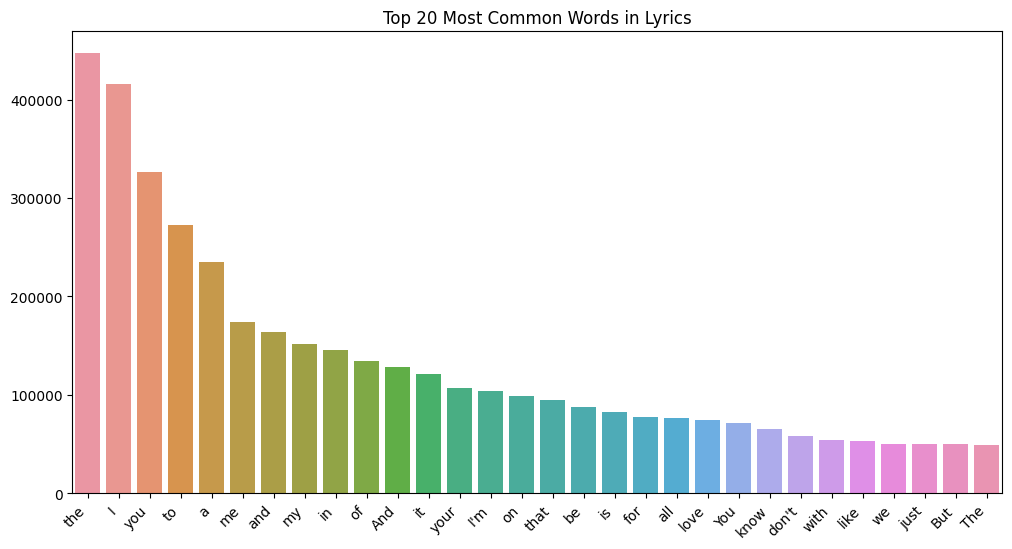

In [ ]:
from collections import Counter

words = ' '.join(df['text']).split()
word_freq = Counter(words)
common_words = word_freq.most_common(30)

plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
plt.title('Top 20 Most Common Words in Lyrics')
plt.xticks(rotation=45, ha='right')
plt.show()

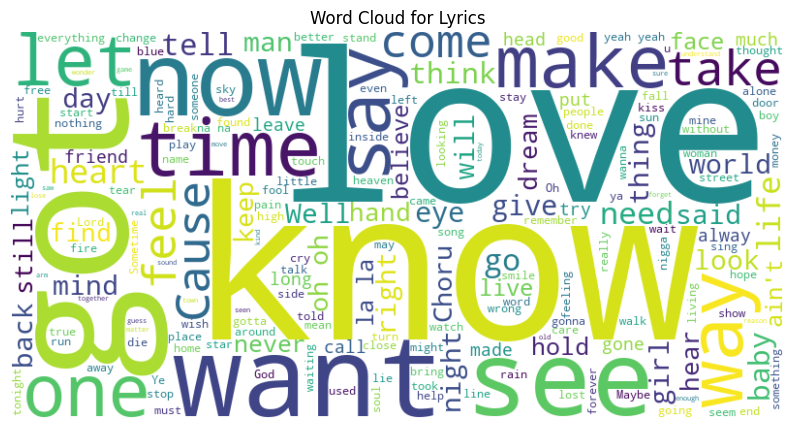

In [ ]:
from wordcloud import WordCloud

# Word Cloud for Lyrics
text_data = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Lyrics')
plt.show()

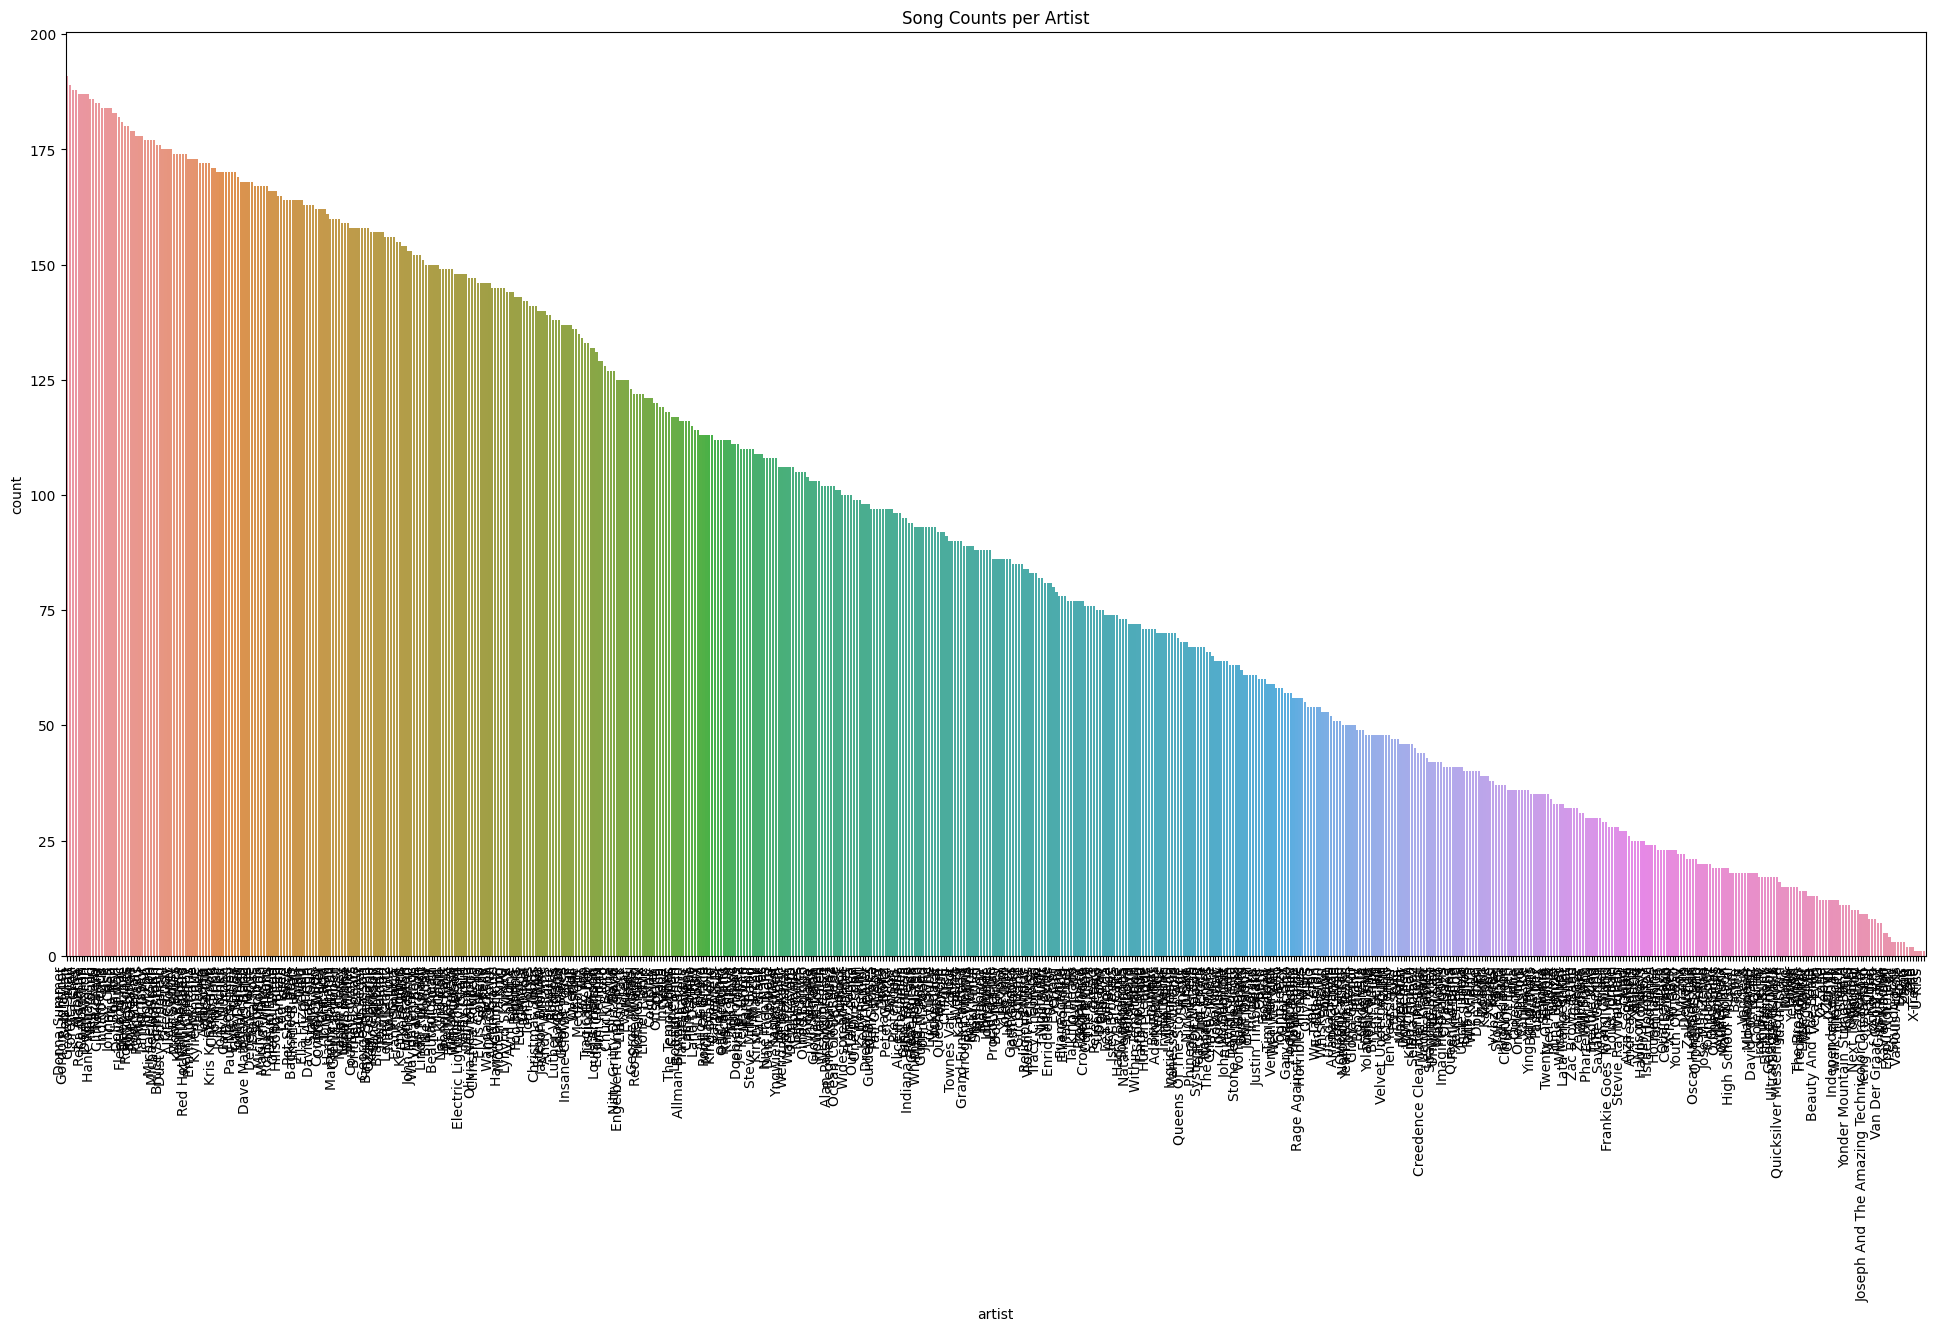

In [ ]:
plt.figure(figsize=(24, 12))
sns.countplot(x='artist', data=df, order=df['artist'].value_counts().index)
plt.title('Song Counts per Artist')
plt.xticks(rotation=90, ha='right')
plt.show()

#ignore other stuff

In [ ]:
# Initialize the Genius API client with your API key
genius = lyricsgenius.Genius("SKSHmDcrMg3JpNs4WxVe58-zFl89-9w8vNV6M7dM44KRlaUMWbxJA3iNBH4pGIZ6")
# Search for the song by the artist
song = genius.search_song("Det Regner i Oslo", "Astrid S")
# Save the lyrics of the song to a JSON file
song.save_lyrics("lyrics.json")

# Using the JSON module, open the json file then specifically access the "lyrics" dict from the API. 
with open("lyrics.json", "r") as json_file:
    lyrics_data = json.load(json_file)
    song_lyrics = lyrics_data["lyrics"]

print(song_lyrics)

Searching for "Det Regner i Oslo" by Astrid S...
Done.


In [ ]:
'''

# Replace 'your_access_token' with your actual Genius API access token
access_token = 'mzzxJgHlCVvfG9XYL1aE1YiXn4TXvyfEAnTjwHodgM0lfhOstPm_cgn_QLiJ9BTN'
base_url = 'https://api.genius.com'

headers = {
    'Authorization': f'Bearer {access_token}'
}

def search_songs_by_genre(genre, num_songs=10):
    search_url = f"{base_url}/search?q={genre}"
    response = requests.get(search_url, headers=headers)
    data = response.json()
    song_info = []

    for hit in data['response']['hits'][:num_songs]:
        song_id = hit['result']['id']
        song_title = hit['result']['title']
        song_artist = hit['result']['primary_artist']['name']
        song_info.append({'id': song_id, 'title': song_title, 'artist': song_artist})

    return song_info

def get_lyrics(song_id):
    song_url = f"{base_url}/songs/{song_id}"
    response = requests.get(song_url, headers=headers)
    data = response.json()
    path = data['response']['song']['path']

    # Scrap the lyrics from the song page
    lyrics_url = f"https://genius.com{path}"
    page = requests.get(lyrics_url)
    lyrics = scrape_lyrics_from_page(page.text)

    return lyrics

def scrape_lyrics_from_page(html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    lyrics_div = soup.find('div', class_='lyrics')
    if lyrics_div:
        return lyrics_div.get_text()
    else:
        return "Lyrics not found."

# Example: Fetching 5 songs in the genre 'rock'
genre = 'rock'
songs = search_songs_by_genre(genre, num_songs=5)

for song in songs:
    print(f"Fetching lyrics for {song['title']} by {song['artist']}")
    lyrics = get_lyrics(song['id'])
    print(lyrics)
    print("\n" + "="*40 + "\n")


'''

Fetching lyrics for Fuckin’ Problems by A$AP Rocky
Lyrics not found.


Fetching lyrics for rockstar by Post Malone
Lyrics not found.


Fetching lyrics for King’s Dead by Jay Rock
Lyrics not found.


Fetching lyrics for 1Train by A$AP Rocky
Lyrics not found.


Fetching lyrics for Praise the Lord (Da Shine) by A$AP Rocky
Lyrics not found.


